In [1]:
from models.SlopeOnePredictor_explicit import SlopeOnePredictor_explicit

import warnings
import random
import warnings

import numpy as np
import random


warnings.filterwarnings('ignore')


def seed_everything(random_seed):
    np.random.seed(random_seed)
    torch.manual_seed(random_seed)
    torch.cuda.manual_seed(random_seed)
    torch.cuda.manual_seed_all(random_seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(random_seed)
    random.seed(random_seed)



sample_data = [
    [2, 5, 0],
    [3, 2, 5],
    [4, 0, 3],
]
sample_data = np.array(sample_data, dtype=np.float32) 

sop = SlopeOnePredictor_explicit(train=np.copy(sample_data), valid=sample_data)
sop.fit()
try:
    assert (4.333333333333333 - sop.predict(user_id=0, item_ids=[2])[0]) < 0.00001
    print("SlopeOnePredictor_explicit.predict() is correct")
except:
    print("SlopeOnePredictor_explicit.predict() is wrong")

SlopeOnePredictor_explicit.predict() is correct


In [2]:
sop.predict(user_id=0, item_ids=[2])

[4.333333333333333]

In [2]:
# 기본 패키지 import
from time import time
import numpy as np
from utils import load_data
from utils import eval_explicit
import warnings
import random
import warnings

import numpy as np
import random


warnings.filterwarnings('ignore')


In [51]:
sample_data = [
    [2, 5, np.nan],
    [3, 2, 5],
    [4, np.nan, 3],
]

In [58]:
sample_data = np.array(sample_data, dtype=np.float32)

In [59]:
user_id= 0

In [60]:
item_ids = [2]

In [61]:
predicted_values = []
    # user i가 시청한 item들
rated_items = np.where(~np.isnan(sample_data[user_id,:]))[0]
for one_missing_item in item_ids:
    # ========================= EDIT HERE ========================
    # [user_id, one_missing_item] 구하기
    bunmo = 0
    bunza = 0
    for r in rated_items:

        temp = sample_data[:,one_missing_item] - sample_data[:,r]
        item_counting = sum( ~np.isnan(temp) )
        temp_mean = np.nanmean(temp)

        if np.isnan(temp_mean):
            continue
        else:

            user_plus_mean =sample_data[user_id,r]+ temp_mean
            bunza  += user_plus_mean * item_counting
            bunmo  += item_counting

    predicted_values.append( bunza/bunmo)

In [62]:
predicted_values

[4.333333333333333]

In [43]:
ssss=   np.where(~np.isnan(sample_data[0,:]))[0]

In [45]:
for i  in ssss:
    print(i)

0
1


In [38]:
sample_data[:,2]

array([nan,  5.,  3.], dtype=float32)

In [50]:
sum( ~np.isnan(sample_data[:,2]) )

2

In [46]:
np.nanmean(sample_data[:,2])

4.0

In [47]:
np.nanmean([np.nan,np.nan,np.nan])

nan

In [39]:
sample_data[:,2] - sample_data[:,1]

array([nan,  3., nan], dtype=float32)

In [33]:
item_iter =  list(range(len(sample_data[0])))

In [34]:
item_iter.pop(2)

2

In [35]:
item_iter

[0, 1]

In [12]:
for i, row in enumerate(sample_data):
    print(sample_data[i, np.where(row < 0.5)])
    

[[0.]]
[]
[[0.]]


In [14]:
tL = [2, 5, np.nan]

In [26]:
~np.isnan(tL)

array([ True,  True, False])

In [27]:
listt  = np.argwhere(~np.isnan(tL))

In [29]:
for i in listt:
    print(i[0])

0
1


In [ ]:
np.where(~np.isnan(self.train[user_id,:]))[0]

In [5]:
sample_data[0, np.where(row < 0.5)] 

NameError: name 'row' is not defined

In [ ]:
sample_data[i, np.where(row < 0.5)[0]] 

# Nonlocal test

In [42]:
class Upper:
    def __init__(self,name,age,job):
        self.name = name
        self.age  = age
        self.job  = job
    
    def method1(self):
        answer = self.job +1
        print(answer)
        return answer
        

In [43]:
class Downer:
    def __init__(self, job):
        self.job= job
        self.model = Upper('Fisher' ,29,self.job)
    
    def fit(self):
        self.model.method1()

In [44]:
instance = Downer(10)

In [45]:
a = instance.fit()

11


# Main.py

In [1]:
# 기본 패키지 import
from time import time
import numpy as np
from utils import load_data
from utils import eval_explicit
import warnings
import random
import warnings

import numpy as np
import random
import torch

warnings.filterwarnings('ignore')

def seed_everything(random_seed):
    np.random.seed(random_seed)
    torch.manual_seed(random_seed)
    torch.cuda.manual_seed(random_seed)
    torch.cuda.manual_seed_all(random_seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(random_seed)
    random.seed(random_seed)

seed = 1
seed_everything(seed)


from models.MF_explicit import MF_explicit
from models.BiasedMF_explicit import BiasedMF_explicit
from models.SVDpp_explicit import SVDpp_explicit

"""
dataset loading
"""
dataset = "movielens_1m.csv" # "movielens_1m.csv" , "naver_movie_dataset_100k.csv"
train_data, valid_data, test_data = load_data(dataset, implicit=False)

"""
model training
"""
print("model training...")
time_start = time()
mf = MF_explicit(train=np.copy(train_data), valid=valid_data, n_features=10)
biasedmf = BiasedMF_explicit(train=np.copy(train_data), valid=valid_data, n_features=10)
svdpp = SVDpp_explicit(train=np.copy(train_data), valid=valid_data, n_features=10)

mf.fit()
biasedmf.fit()
svdpp.fit()
print("training time: ", time()-time_start)
"""
model evaluation
"""
print("model evaluation")
mf_rmse = eval_explicit(mf, train_data, test_data)
biasedmf_rmse = eval_explicit(biasedmf, train_data, test_data)
svdpp_rmse = eval_explicit(svdpp, train_data, test_data)
print("evaluation time: ", time()-time_start)

print("RMSE on Test Data")
print("MF: %f"%(mf_rmse))
print("BiasedMF: %f"%(biasedmf_rmse))
print("SVD++: %f"%(svdpp_rmse))



# of users: 6040,  # of items: 3706,  # of ratings: 1000209
model training...
training time:  70.85752582550049
model evaluation
evaluation time:  73.51092791557312
RMSE on Test Data
MF: 0.880406
BiasedMF: 0.883980
SVD++: 14.953893


# Search.py

# of users: 6040,  # of items: 3706,  # of ratings: 1000209
BiasedMF RSME (rank=1):  0.9132231920294599
BiasedMF RSME (rank=10):  0.8842474094803707
BiasedMF RSME (rank=100):  0.8361730496916066
BiasedMF RSME (rank=1000):  1.0162354962377491
BiasedMF RSME (rank=2000):  1.1736006712530431
SVD++ RSME (rank=1):  14.953892811307245
SVD++ RSME (rank=10):  14.953892811307245
SVD++ RSME (rank=100):  14.953892811307245
SVD++ RSME (rank=1000):  14.953892811307245
SVD++ RSME (rank=2000):  14.953892811307245


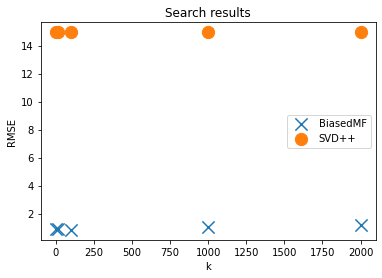

In [2]:
# 기본 패키지 import
import numpy as np
from utils import load_data
from utils import eval_explicit
import warnings
import random
import warnings

import numpy as np
import random
import matplotlib.pyplot as plt

import torch


warnings.filterwarnings('ignore')

def seed_everything(random_seed):
    np.random.seed(random_seed)
    torch.manual_seed(random_seed)
    torch.cuda.manual_seed(random_seed)
    torch.cuda.manual_seed_all(random_seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(random_seed)
    random.seed(random_seed)

seed = 1
seed_everything(seed)

from models.BiasedMF_explicit import BiasedMF_explicit
from models.SVDpp_explicit import SVDpp_explicit

"""
dataset loading
"""
dataset = "movielens_1m.csv" # "naver_movie_dataset_100k.csv", "movielens_1m.csv"
train_data, valid_data, test_data = load_data(dataset, implicit=False)

# ========================= EDIT HERE ========================
"""
Specify values of the parameter to search.
"""
_rank = [1, 10, 100, 1000, 2000]
# ============================================================


biased_mf_test_rmse = []
for i, space in enumerate(_rank):
    model = BiasedMF_explicit(train=np.copy(train_data), valid=valid_data, n_features=space)

    model.fit()
    rmse = eval_explicit(model, train_data+valid_data, test_data)

    print("BiasedMF RSME (rank=%d): " % space, rmse)
    biased_mf_test_rmse.append(rmse)


SVDpp_test_rmse = []
for i, space in enumerate(_rank):
    model = SVDpp_explicit(train=np.copy(train_data), valid=valid_data, n_features=space)

    model.fit()
    rmse = eval_explicit(model, train_data+valid_data, test_data)

    print("SVD++ RSME (rank=%d): " % space, rmse)
    SVDpp_test_rmse.append(rmse)

"""
Draw scatter plot of search results.
- X-axis: search paramter
- Y-axis: RMSE (Train, Test respectively)

Put title, X-axis name, Y-axis name in your plot.

Resources
------------
Official document: https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.scatter.html
"Data Visualization in Python": https://medium.com/python-pandemonium/data-visualization-in-python-scatter-plots-in-matplotlib-da90ac4c99f9
"""

num_space = len(_rank)
plt.scatter(_rank, biased_mf_test_rmse, label='BiasedMF', marker='x', s=150)
plt.scatter(_rank, SVDpp_test_rmse, label='SVD++', marker='o', s=150)
plt.legend()
plt.title('Search results')
plt.xlabel('k')
plt.ylabel('RMSE')
plt.savefig('Search results.png')
